In [1]:
pip install yfinance==0.1.70

Note: you may need to restart the kernel to use updated packages.


In [124]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [125]:
initial_data = yf.download("ETH-USD", start="2021-04-01", end="2022-04-01") # downlading the data from yahoo finacne

[*********************100%***********************]  1 of 1 completed


In [126]:
initial_data.head()#showing the first 5 data information


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-31,1846.098267,1947.837769,1793.002197,1918.362061,1918.362061,30226902621
2021-04-01,1919.157227,1989.055054,1912.178467,1977.276855,1977.276855,30914259795
2021-04-02,1976.932739,2152.451904,1960.678711,2143.225586,2143.225586,34862511022
2021-04-03,2142.895996,2144.962402,2028.422485,2028.422485,2028.422485,32011518871
2021-04-04,2027.671265,2110.353516,2007.111816,2093.122803,2093.122803,26006501902


In [127]:
initial_data[['Adj Close']].head()


,Adj Close
Date,
2021-03-31,1918.362061
2021-04-01,1977.276855
2021-04-02,2143.225586
2021-04-03,2028.422485
2021-04-04,2093.122803


In [128]:
data =  initial_data[['Adj Close']]
data.head()

,Adj Close
Date,
2021-03-31,1918.362061
2021-04-01,1977.276855
2021-04-02,2143.225586
2021-04-03,2028.422485
2021-04-04,2093.122803


In [7]:
data.describe().round(2)   #showig data description

,Adj Close
count,366.00
mean,3118.78
std,753.17
min,1787.51
25%,2534.62
50%,3069.87
75%,3737.87
max,4812.09


array([<AxesSubplot:xlabel='Date'>], dtype=object)

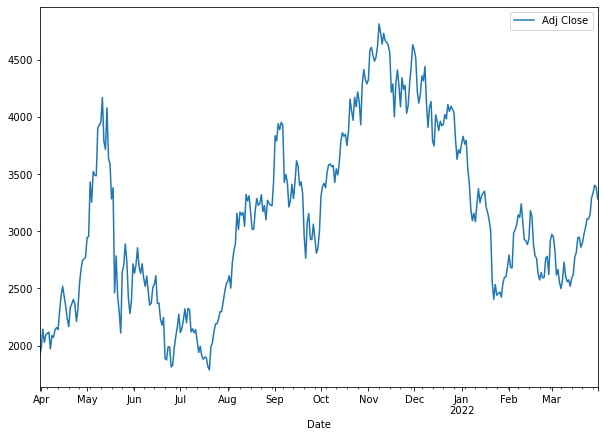

In [8]:
data.plot(figsize=(10, 7), subplots=True) #plotting the movement of the stock


In [10]:
log_return = np.log(initial_data['Adj Close'] / initial_data['Adj Close'].shift(1)) #calculating the volaltilty of the stock


In [11]:
vol = log_return.std()    #daily volatility
print('The daily volatility is', round(vol*100,2), '%')

The daily volatility is 5.14 %


In [12]:
vol = np.sqrt(252) * log_return.std()  #annualised volatility
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 81.63 %


array([<AxesSubplot:xlabel='Date'>], dtype=object)

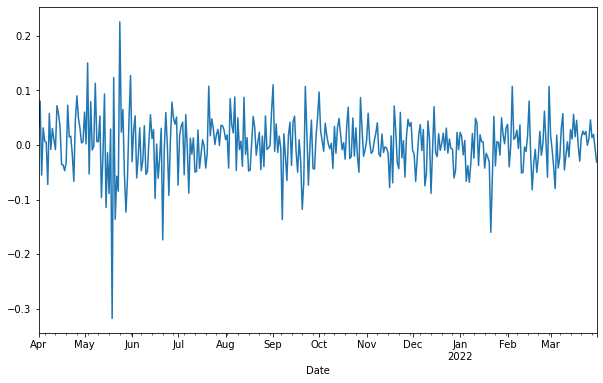

In [13]:
log_return.dropna(inplace=True) #volatility graph
log_return.plot(subplots=True, figsize=(10, 6))

In [14]:
last_six_vol = round(data['Adj Close'][125:].pct_change().apply(lambda x: np.log(1+x)).std() * np.sqrt(252)*100, 2)
print('The last six months volatility is', last_six_vol, '%')   # last six months volatility

The last six months volatility is 66.69 %


In [15]:
first_six_vol = round(data['Adj Close'][:125].pct_change().apply(lambda x: np.log(1+x)).std() * np.sqrt(252)*100, 2)
print('The first six months volatility is', first_six_vol, '%') # first six months volatility   

The first six months volatility is 105.05 %


# Question 2


# Binomial Tree

In [16]:
S = initial_data['Adj Close'][-1]
print('The spot price is', round(S,2))  # getting the spot price

The spot price is 3281.64


In [30]:
S0 = 3282              # spot stock price
K = 3326               # strike price
T = 1/12                # time to maturity 
r = 0.0169                 # risk free rate 
sig = 0.8163              # annaulised volatility
N = 5                   # number of time steps of the tree
payoff = "call"          # payoff 

In [31]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up probability factor
d = 1.0 / u   

In [32]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [33]:
S


array([[3282.        , 3646.75185814, 4052.04116846, 4502.37314453,
        5002.75369618, 5558.74507538],
       [   0.        , 2953.73099652, 3282.        , 3646.75185814,
        4052.04116846, 4502.37314453],
       [   0.        ,    0.        , 2658.29579518, 2953.73099652,
        3282.        , 3646.75185814],
       [   0.        ,    0.        ,    0.        , 2392.41032545,
        2658.29579518, 2953.73099652],
       [   0.        ,    0.        ,    0.        ,    0.        ,
        2153.11899289, 2392.41032545],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        , 1937.76182465]])

In [34]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # probability of the price of underlying asset going up
q = 1.0 - p           # probability of the price of underlying asset going down
p

0.47501248795570683

In [35]:
q

0.5249875120442932

In [36]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[   0.        ,    0.        ,    0.        ,    0.        ,
           0.        , 2232.74507538],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        , 1176.37314453],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,  320.75185814],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ]])

In [37]:
# for European call Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 305.5278535 ,  497.56471379,  782.66959916, 1178.24626355,
        1677.69038759, 2232.74507538],
       [   0.        ,  131.93546214,  239.86674824,  425.16895727,
         726.97785987, 1176.37314453],
       [   0.        ,    0.        ,   34.34925198,   72.33268441,
         152.31822914,  320.75185814],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ]])

In [38]:
print('European ' + payoff, str( V[0,0]))


European call 305.52785350407163


# Monte Carlo Simulation

In [39]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [40]:
T = 1/12
r = 0.0169
sigma = 0.8163
S0 = 3282
K = 3326

In [42]:
S = mcs_simulation_np(10000)    #number of simulations

In [43]:
S = np.transpose(S)
S

array([[3282.        , 3272.7504688 , 3269.96855309, ..., 3478.37387251,
        3479.09957913, 3487.43840335],
       [3282.        , 3296.42053866, 3291.97776121, ..., 3359.91052614,
        3361.94258249, 3350.32422509],
       [3282.        , 3291.55676586, 3294.55262483, ..., 3115.5392068 ,
        3132.53209286, 3143.6506285 ],
       ...,
       [3282.        , 3277.21162602, 3279.60940669, ..., 3610.50976583,
        3614.17579977, 3597.55152775],
       [3282.        , 3278.13801541, 3291.42935104, ..., 4033.74033128,
        4045.81597645, 4039.28415307],
       [3282.        , 3281.60903256, 3277.05764086, ..., 2940.7455012 ,
        2940.09446292, 2941.29037264]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

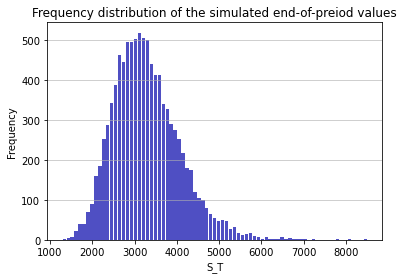

In [44]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [45]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European call', str(p))

European call 330.5782636028527


# Greeks

# Delta

In [47]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta


In [48]:
delta(3282, 3326, 1/12, 0.0169, 0.0052, 0.8163, 'call') # value of delta

0.5258625584052161

In [88]:
S = np.linspace(3200, 3500, 11) #plotting the 3d graph of delta
T = np.linspace(0.5, 2, 21)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 3326, T[i], 0.0169, 0.0055, 0.8163, 'call')

C:\Users\w1847162\AppData\Local\Temp/ipykernel_16520/484774664.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


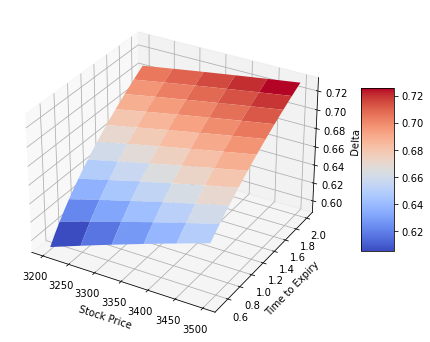

In [89]:
fig = plt.figure(figsize=(10, 6)) #dimension of the graph
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [90]:
S = np.linspace(3200,3500,11)  #plotting the 2d graph 
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 3326, 1/12, 0.0169, 0.0052, 0.8163, 'call')

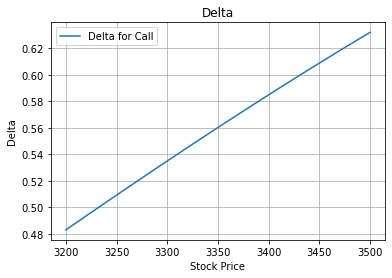

In [91]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call'])

In [93]:
d = delta(3282,3326, 1/12, 0.0169, 0.0054, 0.8163, 'call')
print('The value of Delta is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Delta is 0.5258 . If the stock price increase 1 dollar, then the value of the option will increase $ 0.5258 .


# GAMMA

In [94]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [95]:
gamma(3282, 3326, 1/12, 0.0169, 0.0054, 0.8163, 'call') #value of Gamma

0.0005145040724852303

In [96]:
S = np.linspace(3200, 3500, 11) #plotting the 3d graph
T = np.linspace(0.5, 2, 11)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 3326, T[i], 0.0169, 0.0054, 0.8163, 'call')

C:\Users\w1847162\AppData\Local\Temp/ipykernel_16520/3248754200.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


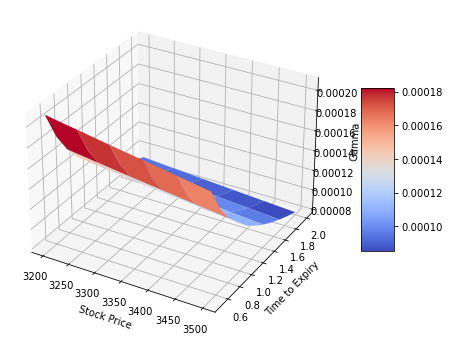

In [97]:
fig = plt.figure(figsize=(10, 6)) #dimension of the graph
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [98]:
S = np.linspace(3200,3500,11) #plotting the 2d graph
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 3326, 1/12, 0.0169, 0.0054, 0.8163, 'call')

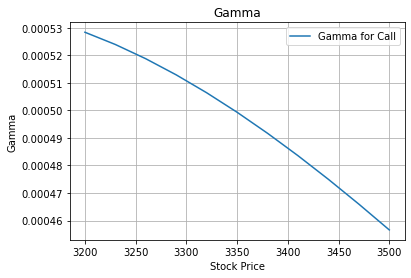

In [99]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call'])

In [100]:
d = gamma(3282, 3326, 1/12, 0.0169, 0.0054, 0.8163, 'call')
print('The value of Gamma is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Gamma is 0.0005 . If the stock price increase 1 dollar, then the value of the option will increase $ 0.0005 .


# RHO

In [101]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [102]:
rho(3282, 3326, 1/12, 0.0169, 0.0054, 0.8163, 'call') #value of rho

119.6778522655075

In [103]:
S = np.linspace(3200, 3500, 11) #plotting the 3d graph of rho
T = np.linspace(0.5, 2, 11)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 3326, T[i], 0.0169, 0.0054, 0.8163, 'call')

C:\Users\w1847162\AppData\Local\Temp/ipykernel_16520/286701165.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


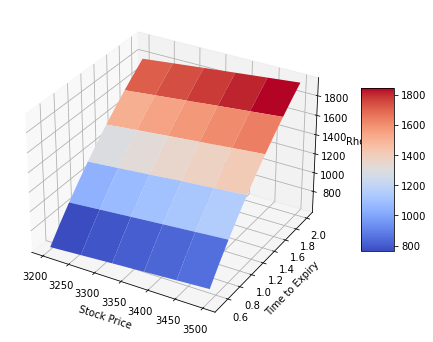

In [104]:
fig = plt.figure(figsize=(10, 6))  #dimension of the graph
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [106]:
r = rho(3282, 3326, 1/12, 0.0169, 0.0054, 0.8163, 'call')
print('The value of Rho is', r.round(4),'.','If the interest rate increases 1%, then the value of the option will increase $', r.round(4)*0.01, '.')

The value of Rho is 119.6779 . If the interest rate increases 1%, then the value of the option will increase $ 1.196779 .


# VEGA

In [107]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [108]:
vega(3282, 3326, 1/12, 0.0169, 0.0054, 0.8163, 'call')  #value of vega

376.99407143544494

In [109]:
S = np.linspace(3200, 3500, 11) #plotting the 3d graph
T = np.linspace(0.5, 2, 11)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 3326, T[i], 0.0169, 0.0054, 0.8163, 'call')

C:\Users\w1847162\AppData\Local\Temp/ipykernel_16520/4011178348.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


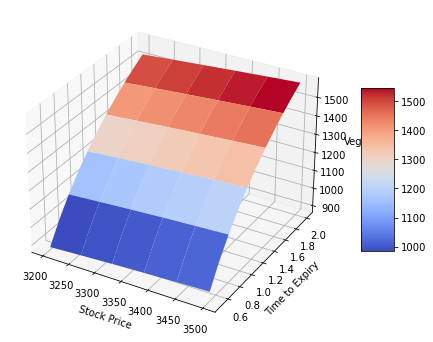

In [110]:
fig = plt.figure(figsize=(10, 6)) #dimensins of the graph
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [114]:
vol = np.linspace(0.1,0.3,11)    #plotting the 2d graph
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(281, 286, 1, 0.0155, 0.0075, vol[i], 'call')

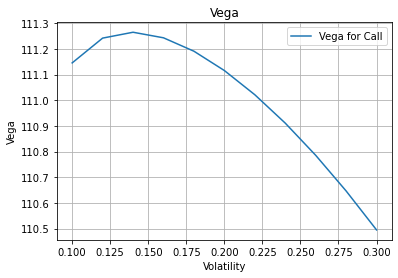

In [115]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call'])


In [116]:
v = vega(3282, 3326, 1/12, 0.0169, 0.0054, 0.8163, 'call')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase $', v.round(4)*0.01, '.')

The value of Vega is 376.9941 . If the volatility increases 1%, then the value of the option will increase $ 3.769941 .



# THETA


In [117]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta


In [118]:
theta(3282, 3326, 1/12, 0.0169, 0.0054, 0.8163, 'call') #value of theta

1861.3931286720647

In [119]:
S = np.linspace(3200, 3500, 11)  #plotting the 3d graph
T = np.linspace(0.5, 2, 11)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 3326, T[i], 0.0169, 0.0054, 0.8163, 'call')

C:\Users\w1847162\AppData\Local\Temp/ipykernel_16520/2274271052.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


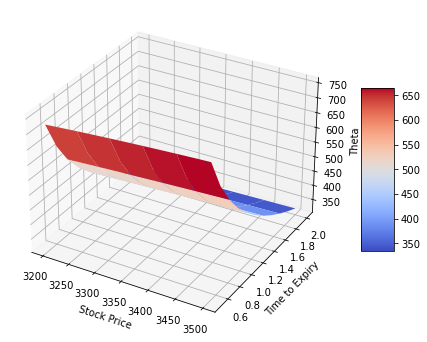

In [120]:
fig = plt.figure(figsize=(10, 6))    #dimensions of thr graph
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [121]:
T = np.linspace(0.25,3,12)   #plotting the 2d graph
Theta_Call = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(3282, 3326, T[i], 0.0169, 0.0054, 0.8163, 'call')

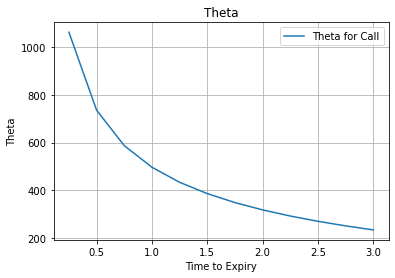

In [122]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call'])


In [129]:
t = theta(3282, 3326, 1/12, 0.0169, 0.0054, 0.8163, 'call')
print('The value of Theta is', t.round(4),'.','If the time increases 1 year, then the value of the option will increase $', t.round(4)*0.01, '.')


The value of Theta is 1861.3931 . If the time increases 1 year, then the value of the option will increase $ 18.613931 .
